# 전국 신규 민간아파트 분양가격 동향
    http://data.go.kr

In [24]:
import pandas as pd
import numpy as np
import seaborn as sns

# 한글깨짐 방지
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="C:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

In [12]:
pre_sale = pd.read_csv("data/apt/2018_7.csv", encoding='cp949')  # or-> euc-kr
pre_sale.head()
pre_sale.shape
pre_sale.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2890 entries, 0 to 2889
Data columns (total 5 columns):
지역명        2890 non-null object
규모구분       2890 non-null object
연도         2890 non-null int64
월          2890 non-null int64
분양가격(㎡)    2750 non-null object
dtypes: int64(2), object(3)
memory usage: 113.0+ KB


In [15]:
# !pip install missingno

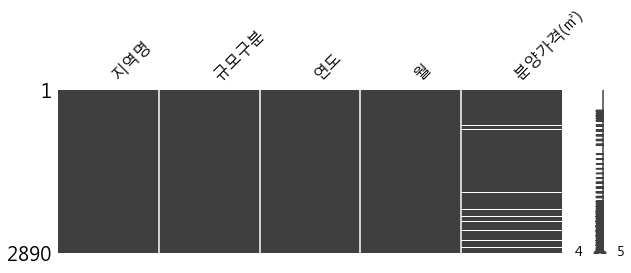

In [25]:
# 결측치 정보 확인
pre_sale.isnull().sum()   # sum(): 차원축소, 요약해서 보기

# 결측치에 대한 내용을 시각화
import missingno as msno
msno.matrix(pre_sale, figsize=(10,3))

In [30]:
pre_sale.info()

pre_sale["분양가격(㎡)"] = pd.to_numeric(pre_sale["분양가격(㎡)"], errors="coerce")  #errors : 에러무시하기 (이 경우, 공란때문에 에러발생)
pre_sale.info()
pre_sale["평당분양가격"] = pre_sale["분양가격(㎡)"] * 3.3
pre_sale.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2890 entries, 0 to 2889
Data columns (total 6 columns):
지역명        2890 non-null object
규모구분       2890 non-null object
연도         2890 non-null int64
월          2890 non-null int64
분양가격(㎡)    2658 non-null float64
평당분양가격     2658 non-null float64
dtypes: float64(2), int64(2), object(2)
memory usage: 135.5+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2890 entries, 0 to 2889
Data columns (total 6 columns):
지역명        2890 non-null object
규모구분       2890 non-null object
연도         2890 non-null int64
월          2890 non-null int64
분양가격(㎡)    2658 non-null float64
평당분양가격     2658 non-null float64
dtypes: float64(2), int64(2), object(2)
memory usage: 135.5+ KB


,지역명,규모구분,연도,월,분양가격(㎡),평당분양가격
0,서울,전체,2015,10,5841.0,19275.3
1,서울,전용면적 60㎡이하,2015,10,5652.0,18651.6
2,서울,전용면적 60㎡초과 85㎡이하,2015,10,5882.0,19410.6
3,서울,전용면적 85㎡초과 102㎡이하,2015,10,5721.0,18879.3
4,서울,전용면적 102㎡초과,2015,10,5879.0,19400.7


In [33]:
pre_sale.isnull().sum()    # 공백문자역들이 변환되면서 null값이 추가됨
pre_sale.describe()

,연도,월,분양가격(㎡),평당분양가격
count,2890.000000,2890.000000,2658.000000,2658.000000
mean,2016.676471,6.382353,3063.297216,10108.880813
std,0.898539,3.515406,1112.743769,3672.054436
min,2015.000000,1.000000,1868.000000,6164.400000
25%,2016.000000,3.000000,2348.000000,7748.400000
50%,2017.000000,6.000000,2743.000000,9051.900000
75%,2017.000000,10.000000,3293.750000,10869.375000
max,2018.000000,12.000000,8098.000000,26723.400000


In [38]:
# 2017년도 데이터 조회
pre_sale_2017 = pre_sale.loc[pre_sale["연도"] == 2017]
pre_sale_2017
pre_sale_2017.shape

(1020, 6)

In [40]:
# 카테고리별 갯수 확인
print(pre_sale["규모구분"].value_counts())
rpint(pre_sale["지역명"].value_counts())

전체                   578
전용면적 60㎡이하           578
전용면적 85㎡초과 102㎡이하    578
전용면적 102㎡초과          578
전용면적 60㎡초과 85㎡이하     578
Name: 규모구분, dtype: int64


세종    170
대구    170
부산    170
충북    170
전남    170
경기    170
경남    170
전북    170
경북    170
대전    170
강원    170
충남    170
서울    170
인천    170
광주    170
울산    170
제주    170
Name: 지역명, dtype: int64

In [49]:
# grouby 와 피봇테이블 응용
# 전국 평균 분양 가격
pre_sale.groupby(pre_sale.연도).describe().T
pre_sale.pivot_table("분양가격(㎡)","규모구분", "연도")

연도,2015,2016,2017,2018
규모구분,,,,
전용면적 102㎡초과,2980.977778,3148.099476,3434.692308,3404.640777
전용면적 60㎡이하,2712.583333,2848.144279,3104.888889,3306.555556
전용면적 60㎡초과 85㎡이하,2694.490196,2816.965686,2977.272727,3170.806723
전용면적 85㎡초과 102㎡이하,2884.395833,3067.380435,3194.061350,3479.722892
전체,2694.862745,2816.073529,3000.385027,3200.915966


In [47]:
# 평 수에 따른 분양가격
pre_sale.groupby(pre_sale.규모구분).describe()
pre_sale.pivot_table("평당분양가격", "규모구분", "연도")

연도,2015,2016,2017,2018
규모구분,,,,
전용면적 102㎡초과,9837.226667,10388.728272,11334.484615,11235.314563
전용면적 60㎡이하,8951.525000,9398.876119,10246.133333,10911.633333
전용면적 60㎡초과 85㎡이하,8891.817647,9295.986765,9825.000000,10463.662185
전용면적 85㎡초과 102㎡이하,9518.506250,10122.355435,10540.402454,11483.085542
전체,8893.047059,9293.042647,9901.270588,10563.022689


In [76]:
pd.options.display.float_format = '{:,.0f}'.format   # 소숫점 이하 자리수는 없애겠다는 의미

In [77]:
# 전국 분양가 변동 금액
region_year_all = pre_sale.loc[pre_sale["규모구분"]=="전체"]
region_year_all

region_year = region_year_all.pivot_table("평당분양가격", "지역명", "연도")   # 값, 행, 열
print(region_year.head())

#index로 셋팅한거 지우기
region_year = region_year_all.pivot_table("평당분양가격", "지역명", "연도").reset_index()
region_year

# 분양가격 변동액 칼럼추가
region_year["변동액"] = region_year[2018] - region_year[2015]
region_year
region_year.sort_values(by='변동액', ascending=False)

연도    2015   2016   2017   2018
지역명                            
강원   7,160  7,011  7,127  7,641
경기  10,377 11,220 11,850 12,881
경남   7,586  7,848  8,120  8,894
경북   7,171  7,361  7,795  8,342
광주   8,052  8,899  9,464  9,638


연도,지역명,2015,2016,2017,2018,변동액
14,제주,"7,405","9,129","10,831","12,492","5,087"
8,서울,"19,725","20,663","21,376","22,329","2,604"
5,대구,"9,232","10,310","11,456","11,737","2,505"
1,경기,"10,377","11,220","11,850","12,881","2,503"
7,부산,"10,307","10,430","11,578","12,756","2,449"
9,세종,"8,750","8,860","9,135","10,375","1,624"
4,광주,"8,052","8,899","9,464","9,638","1,586"
6,대전,"8,098","8,502","9,045","9,604","1,506"
12,전남,"6,317","6,489","7,188","7,792","1,474"
2,경남,"7,586","7,848","8,120","8,894","1,309"


In [85]:
print("가장 많이 오른 곳은 제주이다. 상승액은 평당 약 {:,.0f}원이다.".format((np.max(region_year["변동액"])*1000)))
print("가장 많이 오른 곳은 울산이다. 상승액은 평당 약 {:,.0f}원이다.".format((np.min(region_year["변동액"])*1000)))
print("전국 평균 변동액은 평당 약 {:,.0f}원이다.".format((np.mean(region_year["변동액"])*1000)))

가장 많이 오른 곳은 제주이다. 상승액은 평당 약 5,087,186원이다.
가장 많이 오른 곳은 울산이다. 상승액은 평당 약 369,443원이다.
전국 평균 변동액은 평당 약 1,669,976원이다.


In [104]:
#!pip install plotnine
from plotnine import *

In [125]:
pre_sale["연도"] = pre_sale["연도"].astype(str)
pre_sale["월"] = pre_sale["월"].astype(str)

#### 막대 함께 묶기
    두번째 변수를 기준으로 막대들을 묶음.
    fill 에 하나의 변수를 넣고 geom_bar(position = “dodge”) 로 설정한다.

C:\Users\acorn\Anaconda3\lib\site-packages\plotnine\layer.py:430: UserWarning: position_stack : Removed 17 rows containing missing values.
  data = self.position.setup_data(self.data, params)


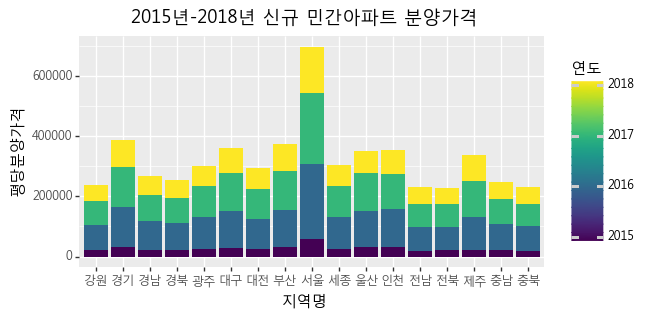

<ggplot: (-9223372036838379253)>

In [116]:
# 지역별 평당 분양가격
# ggplot(mapping=None, data=None, environment=None)
ggplot(region_year_all, aes(x="지역명", y="평당분양가격", fill="연도")) + geom_bar(stat = "identity", position="dodge") +\
    theme(text=element_text(family=font_name), figure_size=(6,3)) + ggtitle("2015년-2018년 신규 민간아파트 분양가격")

C:\Users\acorn\Anaconda3\lib\site-packages\plotnine\layer.py:360: UserWarning: stat_boxplot : Removed 232 rows containing non-finite values.
  data = self.stat.compute_layer(data, params, layout)
C:\Users\acorn\Anaconda3\lib\site-packages\plotnine\stats\stat.py:310: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  stats = pd.concat(stats, axis=0, ignore_index=True)


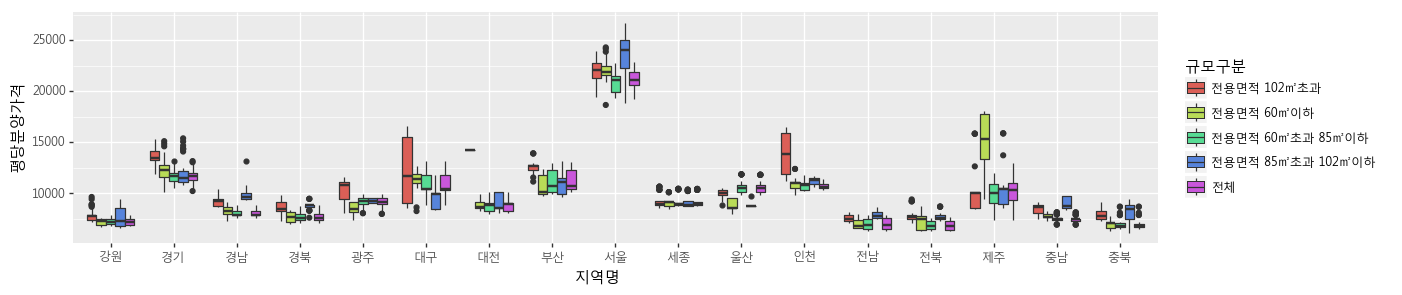

<ggplot: (-9223372036838972328)>

In [124]:
(ggplot(pre_sale, aes(x="지역명", y="평당분양가격", fill="규모구분"))
    + theme(text=element_text(family=font_name), figure_size=(14,3))
    + geom_boxplot())

C:\Users\acorn\Anaconda3\lib\site-packages\plotnine\layer.py:360: UserWarning: stat_boxplot : Removed 5 rows containing non-finite values.
  data = self.stat.compute_layer(data, params, layout)


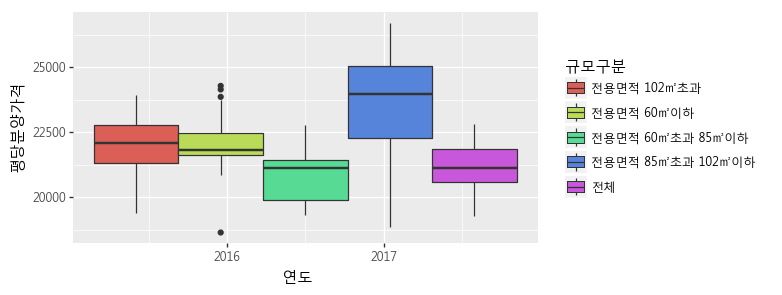

<ggplot: (15901560)>

In [123]:
pre_sale_seoul = pre_sale.loc[pre_sale["지역명"]=="서울"]
(ggplot(pre_sale_seoul, aes(x="연도", y="평당분양가격", fill="규모구분"))
    + theme(text=element_text(family=font_name), figure_size=(6,3))
    + geom_boxplot())

C:\Users\acorn\Anaconda3\lib\site-packages\plotnine\layer.py:360: UserWarning: stat_boxplot : Removed 5 rows containing non-finite values.
  data = self.stat.compute_layer(data, params, layout)


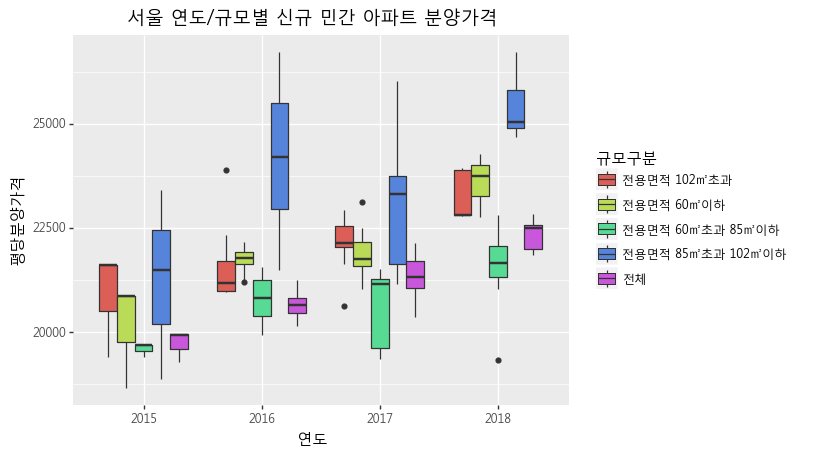

<ggplot: (-9223372036839182311)>

In [139]:
pre_sale_seoul = pre_sale.loc[pre_sale['지역명']=='서울']
(ggplot(pre_sale_seoul,aes(x='연도', y='평당분양가격', fill='규모구분'))
    + ggtitle('서울 연도/규모별 신규 민간 아파트 분양가격')
    + geom_boxplot()
    + theme(text=element_text(family=font_name)))

## 2015년 이전 데이터 전처리

In [142]:
df = pd.read_csv("data/apt/3.3_2015_9.csv", encoding='cp949', skiprows=1, header=0)
df.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26
0,구분,NaN,2013년,2014년,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,(단위: 천원/3.3㎡)
1,시도,시군구,12월,1월,2월,3월,4월,5월,6월,7월,...,3월,4월,5월,6월,7월,8월,9월,전월비,전년말비,전년동월비
2,전국,NaN,"8,059","8,130","8,195","8,204","8,289","8,358","8,344","8,333",...,"8,563","8,613","8,624","8,627","8,643","8,678","8,665",-13,82,207
3,서울,NaN,"18,189","17,925","17,925","18,016","18,098","19,446","18,867","18,742",...,"19,415","18,842","18,367","18,374","18,152","18,443","17,969",-474,"-2,300","-1,434"
4,6대광역시,부산,"8,111","8,111","9,078","8,965","9,402","9,501","9,453","9,457",...,"9,279","9,327","9,345","9,515","9,559","9,581","9,608",1,430,477


In [143]:
df.shape

(23, 27)

In [148]:
year = df.iloc[0]  # 제목빼고 첫번째 행
year
month = df.iloc[1]
month

Unnamed: 0        시도
Unnamed: 1       시군구
Unnamed: 2       12월
Unnamed: 3        1월
Unnamed: 4        2월
Unnamed: 5        3월
Unnamed: 6        4월
Unnamed: 7        5월
Unnamed: 8        6월
Unnamed: 9        7월
Unnamed: 10       8월
Unnamed: 11       9월
Unnamed: 12      10월
Unnamed: 13      11월
Unnamed: 14      12월
Unnamed: 15       1월
Unnamed: 16       2월
Unnamed: 17       3월
Unnamed: 18       4월
Unnamed: 19       5월
Unnamed: 20       6월
Unnamed: 21       7월
Unnamed: 22       8월
Unnamed: 23       9월
Unnamed: 24      전월비
Unnamed: 25     전년말비
Unnamed: 26    전년동월비
Name: 1, dtype: object

In [151]:
for i, y in enumerate(year):   # 현재값에 index를 붙여서 tuple로 return한다
    if i>2 and  i<15:
        year[i] = ''.join(["2014년", month[i]])  # ''은 비어있는값, 여기에 2014년을 join하고 뒤에 해당 month붙여라 라는 뜻
    elif i>=15:
        year[i] = ''.join(["2015년", month[i]])
    elif i == 2:
        year[i] = ''.join([year[i], month[i]])
    elif i == 1:    #결측치 처리
        year[i] = '시군구'

In [154]:
df.columns = year
df
df = df.drop(df.index[[0,1]])

In [157]:
df

# 결측치없애기 (합치기 전 다듬기)
df["구분"] = df["구분"].fillna("")
df["시군구"] = df["시군구"].fillna("")
df

,구분,시군구,2013년12월,2014년1월,2014년2월,2014년3월,2014년4월,2014년5월,2014년6월,2014년7월,...,2015년3월,2015년4월,2015년5월,2015년6월,2015년7월,2015년8월,2015년9월,2015년전월비,2015년전년말비,2015년전년동월비
2,전국,,"8,059","8,130","8,195","8,204","8,289","8,358","8,344","8,333",...,"8,563","8,613","8,624","8,627","8,643","8,678","8,665",-13,82,207
3,서울,,"18,189","17,925","17,925","18,016","18,098","19,446","18,867","18,742",...,"19,415","18,842","18,367","18,374","18,152","18,443","17,969",-474,"-2,300","-1,434"
4,6대광역시,부산,"8,111","8,111","9,078","8,965","9,402","9,501","9,453","9,457",...,"9,279","9,327","9,345","9,515","9,559","9,581","9,608",1,430,477
5,,대구,"8,080","8,080","8,077","8,101","8,267","8,274","8,360","8,360",...,"8,441","8,446","8,568","8,542","8,542","8,795","8,863",27,400,350
6,,인천,"10,204","10,204","10,408","10,408","10,000","9,844","10,058","9,974",...,"9,876","9,938","10,551","10,443","10,443","10,449","10,450",-162,-150,-131
7,,광주,"6,098","7,326","7,611","7,346","7,346","7,523","7,659","7,612",...,"7,861","7,914","7,877","7,881","8,089","8,231","8,083",-148,334,281
8,,대전,"8,321","8,321","8,321","8,341","8,341","8,341","8,333","8,333",...,"8,067","8,145","8,272","8,079","8,079","8,079","7,917",68,610,414
9,,울산,"8,090","8,090","8,090","8,153","8,153","8,153","8,153","8,153",...,"8,629","9,380","9,192","9,190","9,190","9,215","9,215",0,324,722
10,,,"8,151","8,355","8,597","8,552","8,585","8,606","8,669","8,648",...,"8,692","8,858","8,967","8,942","8,984","9,058","9,023",-36,325,352
11,경기,,"10,855","10,855","10,791","10,784","10,876","10,646","10,266","10,124",...,"10,469","10,684","10,685","10,573","10,518","10,573","10,341",-232,-38,-160


In [159]:
df["지역"] = df["구분"] + df["시군구"]

In [160]:
df["지역"]

2          전국
3          서울
4     6대광역시부산
5          대구
6          인천
7          광주
8          대전
9          울산
10           
11         경기
12        수도권
13         세종
14       지방강원
15         충북
16         충남
17         전북
18         전남
19         경북
20         경남
21         제주
22           
Name: 지역, dtype: object

In [164]:
import pprint

melt_columns = df.columns.copy()
melt_columns

Index(['구분', '시군구', '2013년12월', '2014년1월', '2014년2월', '2014년3월', '2014년4월',
       '2014년5월', '2014년6월', '2014년7월', '2014년8월', '2014년9월', '2014년10월',
       '2014년11월', '2014년12월', '2015년1월', '2015년2월', '2015년3월', '2015년4월',
       '2015년5월', '2015년6월', '2015년7월', '2015년8월', '2015년9월', '2015년전월비',
       '2015년전년말비', '2015년전년동월비', '지역'],
      dtype='object', name=0)

In [165]:
df_2013_2015 = pd.melt(df, id_vars=["지역"], value_vars=['2013년12월', '2014년1월', '2014년2월', '2014년3월', '2014년4월',
       '2014년5월', '2014년6월', '2014년7월', '2014년8월', '2014년9월', '2014년10월',
       '2014년11월', '2014년12월', '2015년1월', '2015년2월', '2015년3월', '2015년4월',
       '2015년5월', '2015년6월', '2015년7월', '2015년8월', '2015년9월'])
df_2013_2015.head()

,지역,0,value
0,전국,2013년12월,"8,059"
1,서울,2013년12월,"18,189"
2,6대광역시부산,2013년12월,"8,111"
3,대구,2013년12월,"8,080"
4,인천,2013년12월,"10,204"


In [166]:
df_2013_2015.columns = ['지역', '기간', '분양가']
df_2013_2015.head()

,지역,기간,분양가
0,전국,2013년12월,"8,059"
1,서울,2013년12월,"18,189"
2,6대광역시부산,2013년12월,"8,111"
3,대구,2013년12월,"8,080"
4,인천,2013년12월,"10,204"


In [167]:
df_2013_2015["연도"] = df_2013_2015["기간"].apply(lambda year_month:year_month.split("년")[0])
df_2013_2015

,지역,기간,분양가,연도
0,전국,2013년12월,"8,059",2013
1,서울,2013년12월,"18,189",2013
2,6대광역시부산,2013년12월,"8,111",2013
3,대구,2013년12월,"8,080",2013
4,인천,2013년12월,"10,204",2013
5,광주,2013년12월,"6,098",2013
6,대전,2013년12월,"8,321",2013
7,울산,2013년12월,"8,090",2013
8,,2013년12월,"8,151",2013
9,경기,2013년12월,"10,855",2013
